# Lab 08: High-Dimensional Visualization

**Objectives**
- Understand the challenges of visualizing high-dimensional data.
- Learn techniques for feature selection and dimensionality reduction.
- Visualize embeddings using PCA, t-SNE, and UMAP.
- Explore visualization for model interpretability (SHAP, saliency maps, Grad-CAM).
- Apply interpretability methods to image and text models.


**Tools Used:**
`NumPy`, `Pandas`, `Matplotlib`, `Seaborn`, `Scikit-learn`, `UMAP-learn`, `SHAP`, `torchvision`, and `transformers`.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
sns.set(style='whitegrid')
np.random.seed(42)

## 1. Introduction to High-Dimensional Data

High-dimensional data contain many features (dimensions). Examples include:
- Image pixels (e.g., 224×224×3)
- Text embeddings
- Genomic or financial indicators

Visualizing such data directly is impossible, so we use **dimensionality reduction** techniques.

## 2. Feature Selection

Feature selection identifies the most relevant features before applying dimensionality reduction.
Here we use the Wine dataset for demonstration.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = np.array(data.feature_names)[selector.get_support()]
selected_features

array(['alcohol', 'flavanoids', 'color_intensity',
       'od280/od315_of_diluted_wines', 'proline'], dtype='<U28')

## 3. Principal Component Analysis (PCA)

PCA projects data onto orthogonal directions that capture maximum variance.

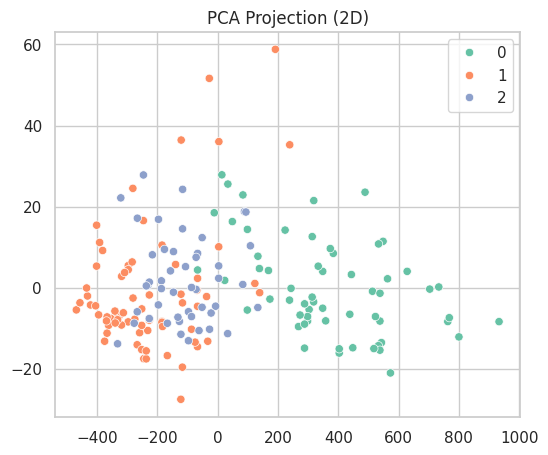

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set2')
plt.title('PCA Projection (2D)')
plt.show()
pca.explained_variance_ratio_

## 4. t-SNE: Non-linear Embedding

t-SNE preserves local structure of data, ideal for visualizing clusters.

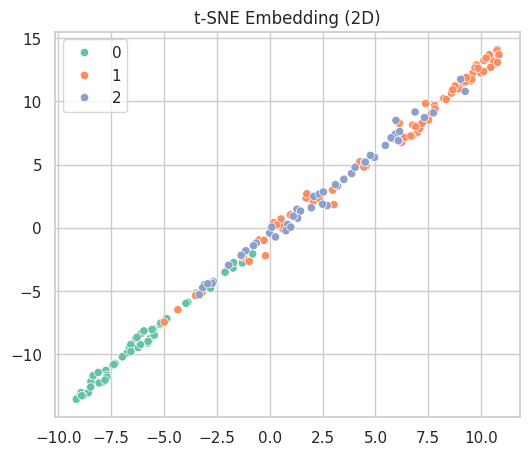

In [ ]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42).fit_transform(X)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette='Set2')
plt.title('t-SNE Embedding (2D)')
plt.show()

## 5. UMAP: Uniform Manifold Approximation and Projection

UMAP is efficient, scalable, and preserves global relationships better than t-SNE.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


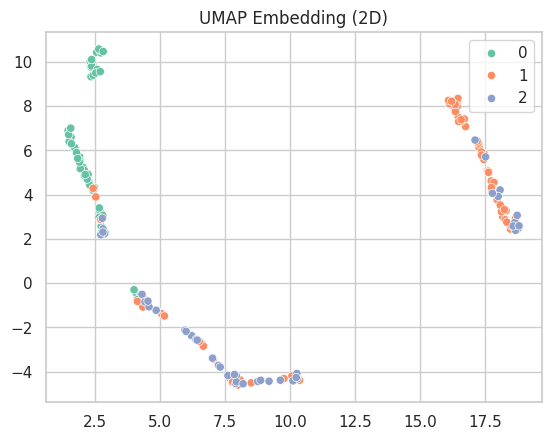

In [ ]:
import umap

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X)

sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=y, palette='Set2')
plt.title('UMAP Embedding (2D)')
plt.show()

## 6. Visual Interpretability for Images (Pretrained Model)

We can use **Grad-CAM** to highlight regions in an image that influenced a model’s prediction.
We'll use a pretrained ResNet model from PyTorch.

## 7. Text Model Interpretability (Pretrained Transformer)

SHAP (SHapley Additive exPlanations) attributes importance to each feature. It helps explain model predictions quantitatively and visually. Using SHAP with a **BERT-like model**, we can visualize word-level importance for sentiment prediction.